---
### 10.2.1 多元线性回归理论
$$y=\beta_0+\beta_1x_1+\cdots+\beta_mx_m+\varepsilon$$
### 10.2.2 多元线性回归应用

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

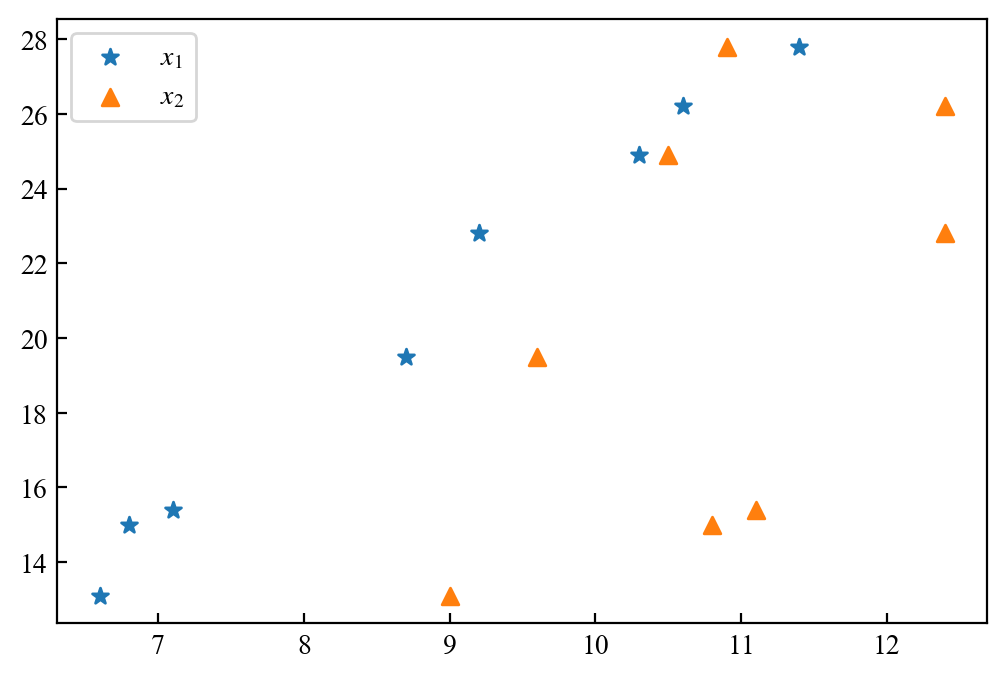

In [2]:
data = np.loadtxt('../../10第10章  回归分析/data10_2.txt')
x1, x2, y = data

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1, y, marker='*', label='$x_1$')
ax.scatter(x2, y, marker='^', label='$x_2$')
ax.legend()
fig.show()

#### 基于公式构建并拟合模型
```python
sm.formula.ols(formula, data=df).fit()
```
其中 `formula` 为公式字符串，`df` 为 DataFrame 或字典格式的数据

In [3]:
mod_dic = {'x1': x1, 'x2': x2, 'y': y}
mod = sm.formula.ols('y~x1+x2', mod_dic).fit()
print(mod.summary())
yhat = mod.predict({'x1': [9, 10], 'x2': [10, 9]})  # 分别预测 x1=9, x2=10 和 x1=10, x2=9 时 y 的值
print("\n残差的方差：", mod.mse_resid)
print("\n预测值：\n", yhat, sep='')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1087.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.52e-07
Time:                        14:22:13   Log-Likelihood:               -0.34349
No. Observations:                   8   AIC:                             6.687
Df Residuals:                       5   BIC:                             6.925
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6284      1.106     -9.607      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 基于数组构建并拟合模型
```python
sm.OLS(y, X).fit()
```
其中 `y` 为因变量的观察值向量，`X` 为自变量观测值矩阵左添一列 1 得到的增广矩阵

In [4]:
X = sm.add_constant(data[:2].T)
X

array([[ 1. ,  7.1, 11.1],
       [ 1. ,  6.8, 10.8],
       [ 1. ,  9.2, 12.4],
       [ 1. , 11.4, 10.9],
       [ 1. ,  8.7,  9.6],
       [ 1. ,  6.6,  9. ],
       [ 1. , 10.3, 10.5],
       [ 1. , 10.6, 12.4]])

In [5]:
mod = sm.OLS(data[-1], X).fit()
print(mod.summary())
yhat = mod.predict(np.array([[1, 9, 10], [1, 10, 9]]))
print("\n残差的方差：", mod.mse_resid)
print("\n预测值：\n", yhat, sep='')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1087.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.52e-07
Time:                        14:22:13   Log-Likelihood:               -0.34349
No. Observations:                   8   AIC:                             6.687
Df Residuals:                       5   BIC:                             6.925
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6284      1.106     -9.607      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
